In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('climate-data.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df2=df.copy()

In [5]:
def kalendar(x):
    parts = x.split("-")
    godini = int(parts[0]) * 365
    meseci = int(parts[1]) * 30
    denovi = int(parts[2])
    return godini+meseci+denovi
    
df2["date"] = df2["date"].apply(kalendar)

In [6]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,734776,10.000000,84.500000,0.000000,1015.666667
1,734777,7.400000,92.000000,2.980000,1017.800000
2,734778,7.166667,87.000000,4.633333,1018.666667
3,734779,8.666667,71.333333,1.233333,1017.166667
4,734780,6.000000,86.833333,3.700000,1016.500000


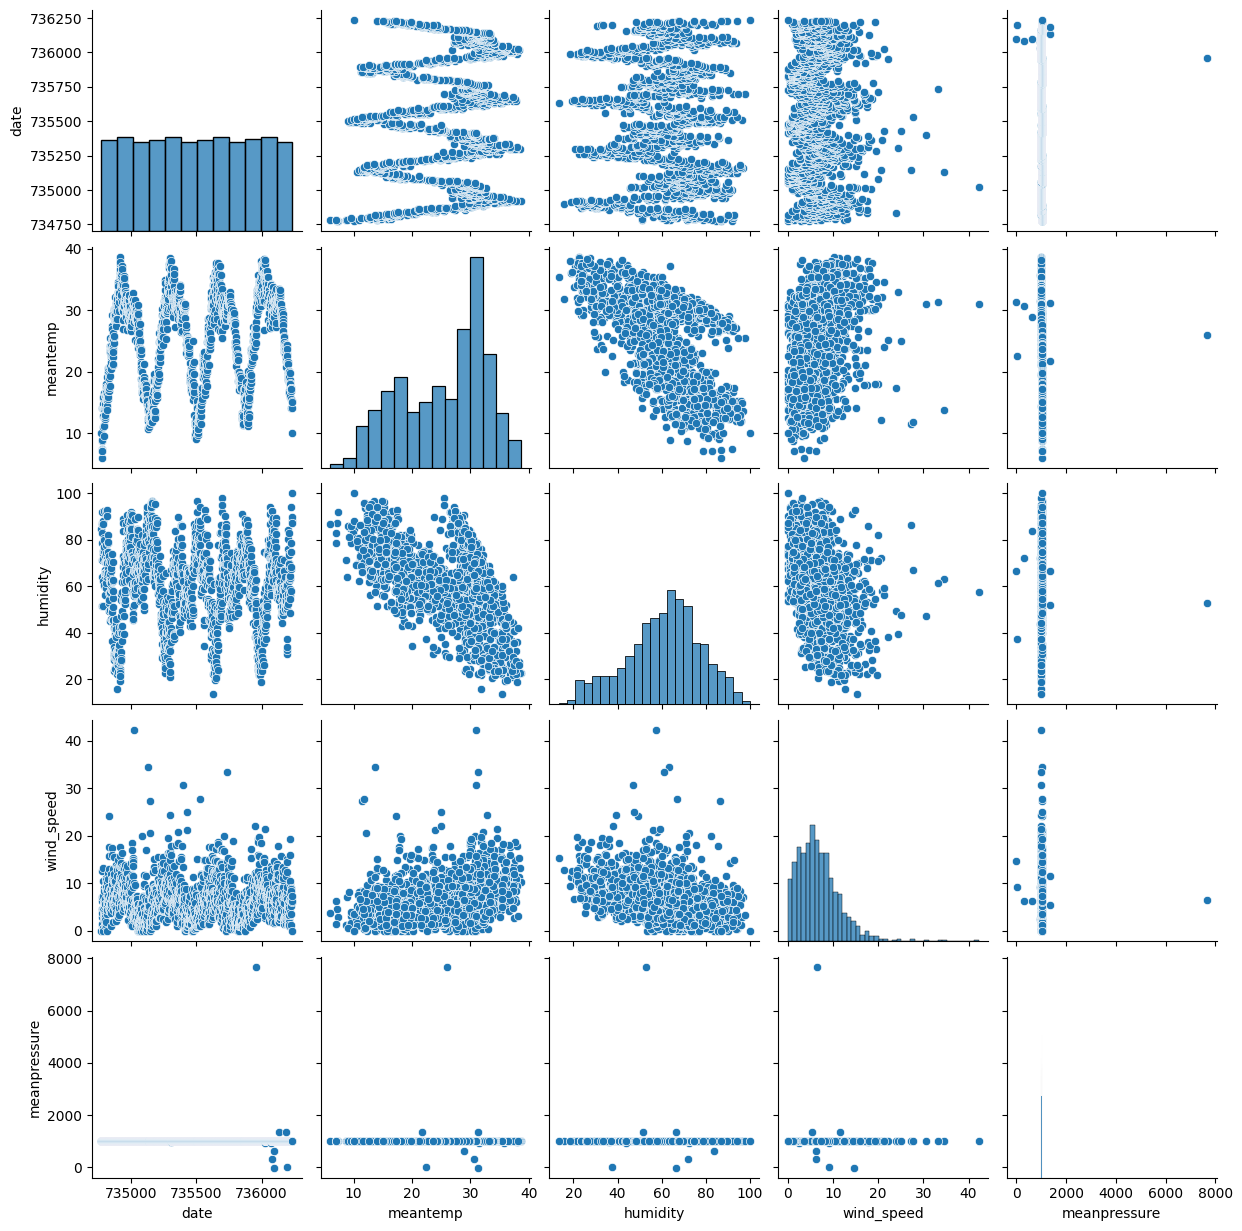

In [7]:
import seaborn as sns
sns.pairplot(df2)

In [8]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,734776,10.000000,84.500000,0.000000,1015.666667
1,734777,7.400000,92.000000,2.980000,1017.800000
2,734778,7.166667,87.000000,4.633333,1018.666667
3,734779,8.666667,71.333333,1.233333,1017.166667
4,734780,6.000000,86.833333,3.700000,1016.500000


In [9]:
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for feature in features:
    for lag in range(1, 4): 
        df2[f'{feature}_lag{lag}'] = df2[feature].shift(lag)

In [10]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,meantemp_lag2,meantemp_lag3,humidity_lag1,humidity_lag2,humidity_lag3,wind_speed_lag1,wind_speed_lag2,wind_speed_lag3,meanpressure_lag1,meanpressure_lag2,meanpressure_lag3
0,734776,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,734777,7.400000,92.000000,2.980000,1017.800000,10.000000,NaN,NaN,84.500000,NaN,NaN,0.000000,NaN,NaN,1015.666667,NaN,NaN
2,734778,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,NaN,92.000000,84.5,NaN,2.980000,0.000000,NaN,1017.800000,1015.666667,NaN
3,734779,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.0,87.000000,92.0,84.5,4.633333,2.980000,0.00,1018.666667,1017.800000,1015.666667
4,734780,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.4,71.333333,87.0,92.0,1.233333,4.633333,2.98,1017.166667,1018.666667,1017.800000


In [11]:
df2.shape

(1462, 17)

In [12]:
df2.isnull().sum()

date                 0
meantemp             0
humidity             0
wind_speed           0
meanpressure         0
meantemp_lag1        1
meantemp_lag2        2
meantemp_lag3        3
humidity_lag1        1
humidity_lag2        2
humidity_lag3        3
wind_speed_lag1      1
wind_speed_lag2      2
wind_speed_lag3      3
meanpressure_lag1    1
meanpressure_lag2    2
meanpressure_lag3    3
dtype: int64

In [13]:
df2=df2.dropna()

In [14]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,meantemp_lag2,meantemp_lag3,humidity_lag1,humidity_lag2,humidity_lag3,wind_speed_lag1,wind_speed_lag2,wind_speed_lag3,meanpressure_lag1,meanpressure_lag2,meanpressure_lag3
3,734779,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.000000,87.000000,92.000000,84.500000,4.633333,2.980000,0.000000,1018.666667,1017.800000,1015.666667
4,734780,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.400000,71.333333,87.000000,92.000000,1.233333,4.633333,2.980000,1017.166667,1018.666667,1017.800000
5,734781,7.000000,82.800000,1.480000,1018.000000,6.000000,8.666667,7.166667,86.833333,71.333333,87.000000,3.700000,1.233333,4.633333,1016.500000,1017.166667,1018.666667
6,734782,7.000000,78.600000,6.300000,1020.000000,7.000000,6.000000,8.666667,82.800000,86.833333,71.333333,1.480000,3.700000,1.233333,1018.000000,1016.500000,1017.166667
7,734783,8.857143,63.714286,7.142857,1018.714286,7.000000,7.000000,6.000000,78.600000,82.800000,86.833333,6.300000,1.480000,3.700000,1020.000000,1018.000000,1016.500000


In [15]:
df2.shape

(1459, 17)

In [16]:
X = df2.drop('meantemp',axis=1)
Y = df2['meantemp']

split_idx = int(0.8 * len(df2))
X_train, X_test = X[:split_idx], X[split_idx:]
Y_train, Y_test = Y[:split_idx], Y[split_idx:]

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Инициализација и обука на Random Forest модел
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, Y_train)

# Предвидување и евалуација
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(f"RMSE: {mean_squared_error(Y_test, y_pred_rf, squared=False):.2f}")
print(f"R^2: {r2_score(Y_test, y_pred_rf):.2f}")

Random Forest Performance:
RMSE: 1.49
R^2: 0.93


C:\Users\cecea\Miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
from xgboost import XGBRegressor

# Инициализација и обука на XGBoost модел
xgb_model = XGBRegressor(
    n_estimators=100, max_depth=5, learning_rate=0.1, objective="reg:squarederror"
)
xgb_model.fit(X_train, Y_train)

# Предвидување и евалуација
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(f"RMSE: {mean_squared_error(Y_test, y_pred_xgb, squared=False):.2f}")
print(f"R^2: {r2_score(Y_test, y_pred_xgb):.2f}")

XGBoost Performance:
RMSE: 1.54
R^2: 0.93


C:\Users\cecea\Miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

xgb_model_2 = XGBRegressor(objective="reg:squarederror", learning_rate=0.1, max_depth=5)

param_grid = {'n_estimators': [50, 100, 200, 300, 400]}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)


Best n_estimators: 100
